In [404]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io
import re
import chardet    

#import re
#import nltk
#import string
#from nltk.stem import WordNetLemmatizer
#from nltk.corpus import stopwords
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
#nltk.download('wordnet')
#nltk.download('stopwords')


In [405]:
#df = pd.read_csv("realDonaldTrump_in_office.csv")
#df = pd.read_csv("realDonaldTrump_in_office.csv")
with open("realDonaldTrump_in_office.csv", 'r', encoding='utf8') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split(",")) for l in temp_f.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

### Read csv
df = pd.read_csv("realDonaldTrump_in_office.csv", header=None, delimiter=",", names=column_names)

In [406]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,ID,Time,Tweet URL,Tweet Text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,@realDonaldTrump,2017-01-20 06:31,https://twitter.com/realDonaldTrump/status/82...,"""It all begins today! I will see you at 11:00...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,@realDonaldTrump,2017-01-20 11:51,https://twitter.com/realDonaldTrump/status/82...,"""Today we are not merely transferring power f...",or from one party to another ‚Äì but we are t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,@realDonaldTrump,2017-01-20 11:51,https://twitter.com/realDonaldTrump/status/82...,"""power from Washington",D.C. and giving it back to you,"the American People. # InaugurationDay""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,@realDonaldTrump,2017-01-20 11:52,https://twitter.com/realDonaldTrump/status/82...,"""What truly matters is not which party contro...",but whether our government is controlled by t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [407]:
df['final_tweet'] = df[df.columns[3:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [408]:
df['final_tweet']

0                                               Tweet Text
1         "It all begins today! I will see you at 11:00...
2         "Today we are not merely transferring power f...
3         "power from Washington, D.C. and giving it ba...
4         "What truly matters is not which party contro...
                               ...                        
23069     "I am asking for everyone at the U.S. Capitol...
23070                            "https://t.co/Pm2PKV0Fp3"
23071                            "https://t.co/csX07ZVWGe"
23072     "The 75,000,000 great American Patriots who v...
23073     "To all of those who have asked, I will not b...
Name: final_tweet, Length: 23074, dtype: object

In [409]:
#Remove URLs


def cleaning_PicURL (text):
    text = re.sub(r'pic.twitter.com/[\w]*',"", text)
    return text

#f['text'] = df['text'].apply(lambda x: cleaning_PicURL(x))



temp_list = []
for index, row in df.iterrows():
    #print(row['final_tweet'])
    text = cleaning_PicURL(row['final_tweet'])
    text = re.sub(r'https?:\/\/\S*', '', text, flags=re.MULTILINE)
    temp_list.append(text)
    
temp_list
df['removeURL'] = temp_list
df['removeURL']



#text = re.sub(r'https?:\/\/\S*', '', df['final_tweet'][11], flags=re.MULTILINE)
#text 
df['removeURL'] = df['removeURL'].replace(r'[^0-9a-zA-Z ]', '', regex=True).replace("'", '')
df.dropna(subset=['removeURL'], inplace=True)
df


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,final_tweet,removeURL
0,ID,Time,Tweet URL,Tweet Text,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tweet Text,Tweet Text
1,@realDonaldTrump,2017-01-20 06:31,https://twitter.com/realDonaldTrump/status/82...,"""It all begins today! I will see you at 11:00...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""It all begins today! I will see you at 11:00...",It all begins today I will see you at 1100 AM...
2,@realDonaldTrump,2017-01-20 11:51,https://twitter.com/realDonaldTrump/status/82...,"""Today we are not merely transferring power f...",or from one party to another ‚Äì but we are t...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Today we are not merely transferring power f...",Today we are not merely transferring power fr...
3,@realDonaldTrump,2017-01-20 11:51,https://twitter.com/realDonaldTrump/status/82...,"""power from Washington",D.C. and giving it back to you,"the American People. # InaugurationDay""",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""power from Washington, D.C. and giving it ba...",power from Washington DC and giving it back t...
4,@realDonaldTrump,2017-01-20 11:52,https://twitter.com/realDonaldTrump/status/82...,"""What truly matters is not which party contro...",but whether our government is controlled by t...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""What truly matters is not which party contro...",What truly matters is not which party control...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23069,@realDonaldTrump,2021-01-07 04:13,https://twitter.com/realDonaldTrump/status/13...,"""I am asking for everyone at the U.S. Capitol...",WE are the Party of Law &amp; Order – respect...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""I am asking for everyone at the U.S. Capitol...",I am asking for everyone at the US Capitol to...
23070,@realDonaldTrump,2021-01-07 05:17,https://twitter.com/realDonaldTrump/status/13...,"""https://t.co/Pm2PKV0Fp3""",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""https://t.co/Pm2PKV0Fp3""",
23071,@realDonaldTrump,2021-01-08 08:10,https://twitter.com/realDonaldTrump/status/13...,"""https://t.co/csX07ZVWGe""",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""https://t.co/csX07ZVWGe""",
23072,@realDonaldTrump,2021-01-08 22:46,https://twitter.com/realDonaldTrump/status/13...,"""The 75",000,000 great American Patriots who voted for me,AMERICA FIRST,and MAKE AMERICA GREAT AGAIN,will have a GIANT VOICE long into the future....,"shape or form!!!""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""The 75,000,000 great American Patriots who v...",The 75000000 great American Patriots who vote...


max tweet len: 560
min tweet len: 1


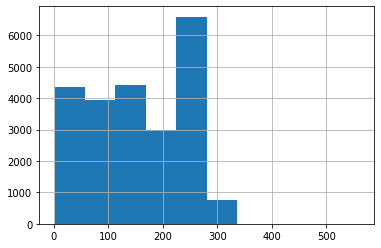

In [410]:
text = df['removeURL'].str.lower()

print('max tweet len:',text.map(len).max())
print('min tweet len:',text.map(len).min())
text.map(len).hist();

In [411]:
chars = sorted(list(set(''.join(text))))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

total chars: 37


In [412]:
chars

[' ',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [413]:
for c in chars[-19:]:
    print('\nCHAR:', c)
    smple = [x for x in text if c in x]
    print(random.sample(smple,min(3,len(smple))))


CHAR: h
[' rt apscoop special episode with the brilliant mzhemingway on the russia collusion hoax and kavanaugh    watch the full video   listen to the podcast  ', ' nadler ripped final argument away from schiff thinks shifty did a terrible job they are fighting big time ', ' i want to applaud the fbi secret service department of justice the us attorneys office for the southern district of new york the nypd and all law enforcement partners across the country for their incredible work skill and determination']

CHAR: i
[' the pledge of allegiance to our great country in st louis park minnesota is under siege that is why i am going to win the great state of minnesota in the 2020 election people are sick and tired of this stupidity and disloyalty to our wonderful usa', ' china talks are going very well', ' we have just built this powerful wall in new mexico completed on january 30 2019  47 days ahead of schedule many miles more now under construction finishthewall ']

CHAR: j
[' this was

In [414]:
# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 1
sentences = []
next_chars = []
for x in text:
    for i in range(0, len(x) - maxlen, step):
        sentences.append(x[i: i + maxlen])
        next_chars.append(x[i + maxlen])
print('nb sequences:', len(sentences))

nb sequences: 2724604


In [415]:
## check example
for i in range(3):
    print(sentences[i],'==>',next_chars[i])

 it all begins today i will see you at 1 ==> 1
it all begins today i will see you at 11 ==> 0
t all begins today i will see you at 110 ==> 0


In [416]:
text[1]


' it all begins today i will see you at 1100 am for the swearingin the movement continues  the work begins'

In [417]:
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Vectorization...


C:\Users\Faiz\AppData\Local\Temp\ipykernel_43396\3587441563.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
C:\Users\Faiz\AppData\Local\Temp\ipykernel_43396\3587441563.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), len(chars)), dtype=np.bool)


# build the model: a single LSTM¶


In [418]:
print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

# optimizer = RMSprop(lr=0.01)
optimizer = Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

Build model...


#  Sampler

In [419]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [420]:
for temperature in [0.1, 0.2, 0.3,  0.5, 1.0, 1.2, 1.3]:
    print(sample([.1,.3,.5,.1],temperature=temperature))

2
2
2
2
1
1
1


# Generate Text at Epoch End

In [421]:
def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)
    
#     start_index = random.randint(0, len(text) - maxlen - 1)
    tweet = np.random.choice(text) # select random tweet
    start_index = 0

    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = tweet[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(120):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()


In [422]:
epochs = 1

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

model.fit(x, y,
          batch_size=128,
          epochs=epochs,
          callbacks=[print_callback])

21285/21286 [============================>.] - ETA: 0s - loss: 1.8116
----- Generating text after Epoch: 0
----- diversity: 0.2
----- Generating with seed: " happy thanksgiving "
 happy thanksgiving  a  a a aa a aaaa iaaa aaaa a aaaaa aaaa aaaaaia a aaaiaa aaaaa aaaa aaaaa aaae a  aaaa aaaiaa aaaa aaaaaaa aaaa aaaaaa 
----- diversity: 0.5
----- Generating with seed: " happy thanksgiving "
 happy thanksgiving oaaaaaas a a aiaaa  aaaa aaas a aias a aietriaaiana eaaoaseaaoaiaoaaaoooiataiiaaisa oaiao  asonaian caoaaisaaaonioaaaics
----- diversity: 1.0
----- Generating with seed: " happy thanksgiving "
 happy thanksgiving atbiafanaia noosns eaoss   lvioosr aae o ofainaoa laenaae aonaaaeenrearoiibaiulijd so alao c ocmaaohiaasvlilon   li aiic
----- diversity: 1.2
----- Generating with seed: " happy thanksgiving "
 happy thanksgiving a a iaiicolauaoits ia1cn mauessacnuzaaaoiscriaoeia pamrbaptaioaamioaaaaetoaoetsaamoanaaaefsiiaaraeaemeoaui siaabeumstain
21286/21286 [============================

In [423]:
print('Build model...')
model2 = Sequential()
model2.add(LSTM(128, input_shape=(maxlen, len(chars)),return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(128))
model2.add(Dropout(0.2))
model2.add(Dense(len(chars), activation='softmax'))

# optimizer = RMSprop(lr=0.01)
optimizer = Adam()
model2.compile(loss='categorical_crossentropy', optimizer=optimizer)

Build model...


# Print Test Sentence¶


In [424]:
def generate_w_seed(sentence,diversity):
    sentence = sentence[0:maxlen]
    print(f'seed: {sentence}')
    print(f'diversity: {diversity}')
    generated = ''
    generated += sentence
    
    sys.stdout.write(generated)

    for i in range(120):
        x_pred = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_indices[char]] = 1.

        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, diversity)
        next_char = indices_char[next_index]

        generated += next_char
        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()
    return


In [425]:
for s in random.sample(list(text),5):
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        generate_w_seed(s,diversity)
        print()

seed:  the passage of the deptvetaffairs accou
diversity: 0.2
 the passage of the deptvetaffairs account to the people the fact to continue to continue to the state and the fake news we are in the state of the state to the

seed:  the passage of the deptvetaffairs accou
diversity: 0.5
 the passage of the deptvetaffairs account are that with the court to the befe to do the ross in the one lies make for our country border congress to the united

seed:  the passage of the deptvetaffairs accou
diversity: 1.0
 the passage of the deptvetaffairs accountlortime on great votes annoum i state on thisgly dent with repease to come commino of our now have to secoble tought o

seed:  the passage of the deptvetaffairs accou
diversity: 1.2
 the passage of the deptvetaffairs accoud memanes inwa trimp torky ressead dece fron stach each border mirtaitia houst brignt to that leakly oarfige faco your f

seed:  president trump has done more for minor
diversity: 0.2
 president trump has done more for minor t

KeyboardInterrupt: 